# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [1]:
import pandas as pd 
import numpy as np
import warnings
import seaborn as sb
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("C:\\Users\\Katerina\\OneDrive\\Documents\\LCW+ Assignments\\Final Project DA\\data\\posture_vs_personality.csv")
df['E VS I'] = df['MBTI'].astype(str).str[0]
df

,S No,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY LEVEL,PAIN 1,PAIN 2,PAIN 3,PAIN 4,...,E,I,S,N,T,F,J,P,POSTURE,E VS I
0,1,53,62,125,Female,Low,0.0,0.0,0.0,0.0,...,18,3,17,9,9,13,18,4,A,E
1,2,52,69,157,Male,High,7.0,8.0,5.0,3.0,...,6,15,14,12,21,3,13,9,B,I
2,3,30,69,200,Male,High,0.0,0.0,0.0,0.0,...,15,6,16,10,15,9,12,10,A,E
3,4,51,66,175,Male,Moderate,9.5,9.5,9.5,1.5,...,6,15,21,5,13,11,19,3,D,I
4,5,45,63,199,Female,Moderate,4.0,5.0,2.0,2.0,...,14,7,20,6,9,15,16,6,A,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,93,16,58,100,Male,Moderate,0.0,0.0,0.0,3.0,...,19,2,22,4,19,5,2,20,B,E
93,94,45,62,134,Female,Moderate,0.0,4.0,0.0,0.0,...,11,10,17,9,6,18,13,9,B,E
94,95,43,69,188,Male,Moderate,2.0,0.0,0.0,0.0,...,12,9,9,17,6,18,2,20,A,E
95,96,28,67,180,Female,Low,0.0,0.0,0.0,0.0,...,11,10,22,14,8,16,14,8,B,E


## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

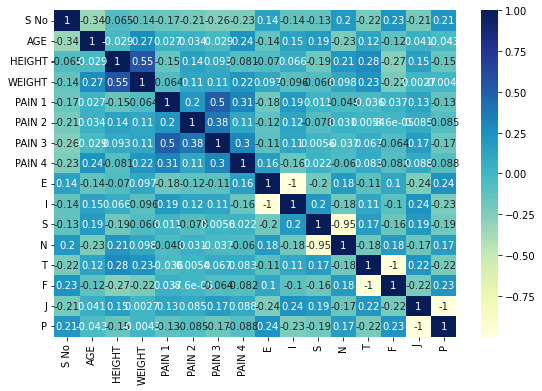

<Figure size 1080x720 with 0 Axes>

In [3]:
fig = plt.gcf()  # or by other means, like plt.subplots
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 1.5) 
sb.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.figure(figsize =(15,10))
plt.show()

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

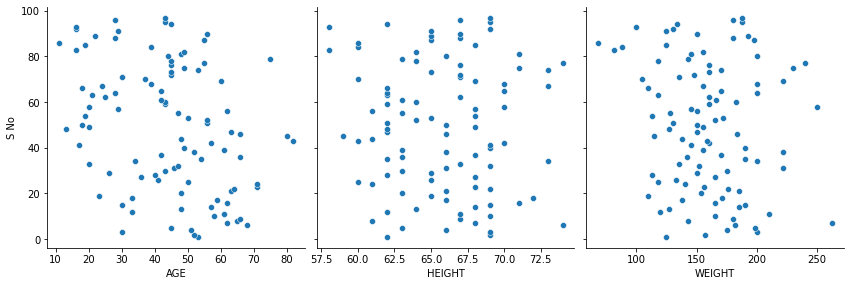

In [14]:
sb.pairplot(df, x_vars=['AGE', 'HEIGHT','WEIGHT'], 
             y_vars='S No', height=4, aspect=1, kind='scatter')
plt.show()


In [12]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   S No            97 non-null     int64  
 1   AGE             97 non-null     int64  
 2   HEIGHT          97 non-null     int64  
 3   WEIGHT          97 non-null     int64  
 4   SEX             97 non-null     object 
 5   ACTIVITY LEVEL  97 non-null     object 
 6   PAIN 1          97 non-null     float64
 7   PAIN 2          97 non-null     float64
 8   PAIN 3          97 non-null     float64
 9   PAIN 4          97 non-null     float64
 10  MBTI            97 non-null     object 
 11  E               97 non-null     int64  
 12  I               97 non-null     int64  
 13  S               97 non-null     int64  
 14  N               97 non-null     int64  
 15  T               97 non-null     int64  
 16  F               97 non-null     int64  
 17  J               97 non-null     int64

,S No,AGE,HEIGHT,WEIGHT,PAIN 1,PAIN 2,PAIN 3,PAIN 4,E,I,S,N,T,F,J,P
count,97.000000,97.000000,97.000000,97.00000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,49.000000,43.855670,65.731959,159.43299,2.139175,3.747423,1.943299,2.530928,12.690722,8.288660,15.134021,11.041237,10.505155,13.443299,10.319588,11.680412
std,28.145456,16.776093,3.737522,36.19591,2.572635,3.191071,2.587909,3.111483,5.717956,5.697146,4.833970,4.732242,5.332924,5.297344,5.727395,5.711003
min,1.000000,11.000000,58.000000,68.00000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,5.000000,1.000000,0.000000,2.000000,0.000000,2.000000
25%,25.000000,30.000000,63.000000,135.00000,0.000000,0.000000,0.000000,0.000000,8.000000,3.000000,12.000000,7.000000,6.000000,10.000000,5.000000,6.000000
50%,49.000000,45.000000,66.000000,157.00000,1.000000,3.000000,0.500000,0.000000,13.000000,8.000000,15.000000,11.000000,11.000000,13.000000,11.000000,11.000000
75%,73.000000,56.000000,68.000000,183.00000,4.000000,7.000000,3.500000,5.000000,18.000000,13.000000,19.000000,14.000000,14.000000,18.000000,16.000000,17.000000
max,97.000000,82.000000,74.000000,263.00000,9.500000,10.000000,10.000000,10.000000,21.000000,19.000000,25.000000,21.000000,22.000000,24.000000,20.000000,22.000000


In [17]:
x = df['S No']
y = df['P']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size =0.7 , test_size = 0.3, random_state = 100 )

x_train
y_train


21    14
63    13
33     6
89    17
72     9
      ..
79    11
87     8
67    15
24    10
8      9
Name: P, Length: 67, dtype: int64

In [18]:
import statsmodels.api as sm

x_train_sm = sm.add_constant(x_train)

lr = sm.OLS(y_train , x_train_sm).fit()

lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      P   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     5.356
Date:                Tue, 07 Mar 2023   Prob (F-statistic):             0.0238
Time:                        21:35:11   Log-Likelihood:                -206.80
No. Observations:                  67   AIC:                             417.6
Df Residuals:                      65   BIC:                             422.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4320      1.368      6.163      0.000       5.700      11.164
S No           0.0545      0.024      2.314      0.024       0.007       0.102
==============================================================================
Omnibus:                       22.366   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                4.342
Skew:                           0.024   Prob(JB):                        0.114
Kurtosis:                       1.754   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Error Terms

Finally, plot your error terms!

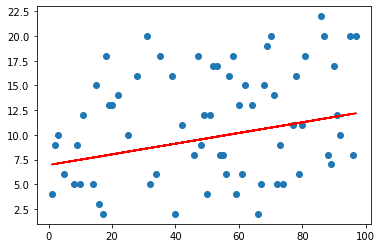

In [25]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.948 + 0.054*x_train, 'r')
plt.show()

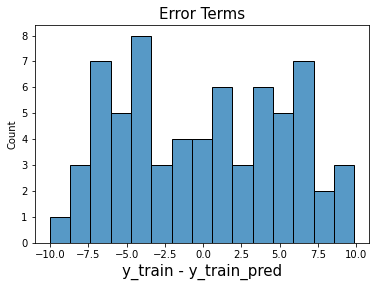

In [30]:
y_train_pred = lr.predict(x_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

# Plotting the histogram using the residual values
fig = plt.figure()
sb.histplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.638
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? It was not particularly effective in this case.
3. Was your plot of the error terms a bell curve? Not really